In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import h5py





def load_data():

  train_dataset = h5py.File('C:\\Users\\user\\Desktop\\CatVNONcat\\train_catvsnoncat.h5','r')

  train_set_x_orig = np.array(train_dataset["train_set_x"][:])

  train_set_y_orig = np.array(train_dataset["train_set_y"][:])



  test_dataset = h5py.File('C:\\Users\\user\\Desktop\\CatVNONcat\\test_catvsnoncat.h5','r')

  test_set_x_orig = np.array(test_dataset["test_set_x"][:])

  test_set_y_orig = np.array(test_dataset["test_set_y"][:])


  # Reshape

  train_set_y_orig = train_set_y_orig.reshape((1,train_set_y_orig.shape[0]))
  test_set_y_orig = test_set_y_orig.reshape((1,test_set_y_orig.shape[0]))

  return train_set_x_orig,train_set_y_orig,test_set_x_orig,test_set_y_orig

train_x_orig,train_y,test_x_orig,test_y = load_data()
print("Training set X shape :", train_x_orig)
print("Training set Y shape :", train_y)
print("Testing set X shape :", test_x_orig)
print("Testing set Y shape :", test_y)


train_x = train_x_orig.reshape(train_x_orig.shape[0],-1).T /255
test_x = test_x_orig.reshape(test_x_orig.shape[0],-1).T /255

print("Flattened train_x shape:", train_x.shape)
print("Flattened test_x shape:", test_x.shape)


Training set X shape : [[[[ 17  31  56]
   [ 22  33  59]
   [ 25  35  62]
   ...
   [  1  28  57]
   [  1  26  56]
   [  1  22  51]]

  [[ 25  36  62]
   [ 28  38  64]
   [ 30  40  67]
   ...
   [  1  27  56]
   [  1  25  55]
   [  2  21  51]]

  [[ 32  40  67]
   [ 34  42  69]
   [ 35  42  70]
   ...
   [  1  25  55]
   [  0  24  54]
   [  1  21  51]]

  ...

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]]


 [[[196 192 190]
   [193 186 182]
   [188 179 174]
   ...
   [ 90 142 200]
   [ 90 142 201]
   [ 90 142 201]]

  [[230 229 229]
   [204 199 197]
   [193 186 181]
   ...
   [ 91 143 201]
   [ 91 143 201]
   [ 91 143 201]]

  [[232 225 224]
   [235 234 234]
   [208 205 202]
   ...
   [ 91 144 202]
   [ 

Cost after iteration 0 : 0.8678602318847487
Cost after iteration 100 : 0.4665099546303397
Cost after iteration 200 : 0.3272700661808656
Cost after iteration 300 : 0.20950946401953646
Cost after iteration 400 : 0.10923019146539371
Cost after iteration 500 : 0.06774940728242392
Cost after iteration 600 : 0.04183985075354586
Cost after iteration 700 : 0.02875237596209534
Cost after iteration 800 : 0.021765322679209175
Cost after iteration 900 : 0.017092762481246138
Cost after iteration 1000 : 0.01393728455180789
Cost after iteration 1100 : 0.011691766382343614
Cost after iteration 1200 : 0.01001566989743387
Cost after iteration 1300 : 0.00871013890801427
Cost after iteration 1400 : 0.007700518932974933
Cost after iteration 1500 : 0.006866375117135304
Cost after iteration 1600 : 0.006195928246913118
Cost after iteration 1700 : 0.005638229680908284
Cost after iteration 1800 : 0.0051678262573516655
Cost after iteration 1900 : 0.004766509080923271
Cost after iteration 2000 : 0.004420577988390

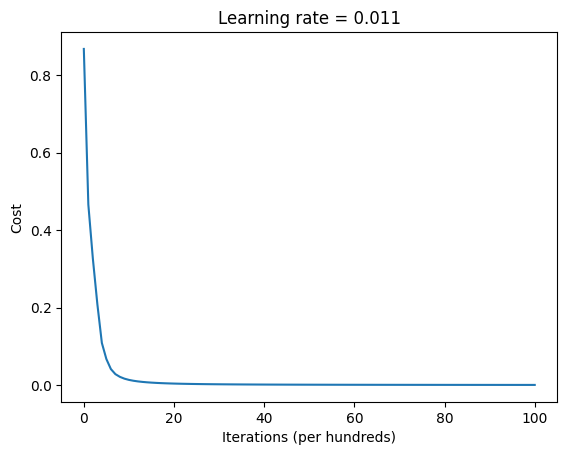

In [30]:
layer_dims = [12288,128,64,1]
parameters = L_layer_model(train_x,train_y,layer_dims,learning_rate=0.011,num_iterations=10001,print_cost=True, lambd =0.0006)

In [2]:
def sigmoid(Z):

  A = 1/(1+np.exp(-Z))

  return A,Z


def relu(Z):

  A = np.maximum(0,Z)

  return A,Z


def sigmoid_backward(dA,cache):

  Z = cache

  s = 1/(1+np.exp(-Z))

  dZ = dA * s * (1-s)

  return dZ


def relu_backward(dA,cache):

  Z = cache

  dZ = np.array(dA, copy = True)

  dZ[Z <= 0] = 0

  return dZ

In [3]:
def initialize_parameters_deep(layer_dims):

  np.random.seed(3)

  L = len(layer_dims)

  parameters = {}

  for l in range (1,L):

    parameters['W' + str(l)] = np.random.randn(layer_dims[l],layer_dims[l-1]) * np.sqrt(2./layer_dims[l-1])

    parameters['b' + str(l)] = np.zeros((layer_dims[l],1))


  return parameters




In [4]:
def linear_forward(A_prev,W,b ):




  Z = np.dot(W,A_prev) + b

  cache = (A_prev, W, b)

  return Z, cache


def linear_activation_forward(A_prev,W,b,activation):

  Z,linear_cache = linear_forward(A_prev,W,b)

  if activation == "relu":
    A,activation_cache = relu(Z)

  elif activation == "sigmoid":
    A,activation_cache = sigmoid(Z)

  cache = (linear_cache,activation_cache)


  return A,cache





In [5]:
def L_model_forward(X,parameters):

  caches = []

  A = X

  L = len(parameters) // 2 # Doubt


  for l in range (1,L):
    A_prev = A
    A, cache = linear_activation_forward(A_prev,parameters['W' + str(l)],parameters['b' + str(l)],activation="relu")

    caches.append(cache)

  AL,cache = linear_activation_forward(A,parameters['W' + str(L)],parameters['b' + str(L)],activation="sigmoid")
  caches.append(cache)

  return AL,caches

In [6]:
def compute_cost(Y,AL,parameters,lambd = 0):

  m = Y.shape[1]     # why use X at some places and Y at others to get m? why not stick to just X?

  cost = (-1/m) * np.sum(Y * np.log(AL) + (1-Y) * np.log(1-AL))

  L2_cost = 0

  if lambd > 0:
    for l in range(1,len(parameters)//2 + 1):
        W = parameters['W' + str(l)]

        L2_cost += np.sum(np.square(W))

  L2_cost =(lambd / (2 * m)) * L2_cost

  cost = cost + L2_cost

  cost = np.squeeze(cost)

  return cost


  

In [7]:
def linear_backward(dZ,cache,lambd = 0):


  A_prev,W,b = cache

  m = A_prev.shape[1]

  dW = (1/m) * np.dot(dZ,A_prev.T) + (lambd / m) * W

  db = (1/m) * np.sum(dZ, axis=1, keepdims=True)

  dA_prev = np.dot(W.T,dZ)


  return dA_prev,dW,db



In [8]:
def linear_activation_backward(dA, cache, activation, lambd = 0):

  linear_cache,activation_cache = cache

  if activation == "relu":

    dZ = relu_backward(dA,activation_cache)

  elif activation == "sigmoid":

    dZ = sigmoid_backward(dA,activation_cache)

  dA_prev,dW,db = linear_backward(dZ,linear_cache,lambd = 0)

  return dA_prev,dW,db



In [9]:
def L_model_backward(AL,caches,Y,lambd = 0 ):

  grads = {}

  L = len(caches)

  m = AL.shape[1]

  Y = Y.reshape(AL.shape)


  dAL = -(np.divide(Y,AL + 1e-8) - np.divide(1 - Y, 1 - AL + 1e-8))


# Output Layer

  current_cache = caches[L-1]

  grads["dA" + str(L-1)], grads["dW" + str(L)], grads["db" + str(L)] =  linear_activation_backward(dAL, current_cache, "sigmoid", lambd = lambd)


# Input Layer

  for l in reversed(range(L-1)):

    current_cache = caches[l]

    dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads['dA' + str(l+1)], current_cache,"relu",lambd = lambd)

    grads["dA" + str(l)] = dA_prev_temp

    grads["dW" + str(l+1)] = dW_temp

    grads["db" + str(l+1)] = db_temp



  return grads




In [10]:
def update_parameters(grads,learning_rate,parameters):

  L = len(parameters) // 2

  for l in range (1,L+1):

    parameters["W" + str(l)] -= learning_rate * grads["dW" + str(l)]
    parameters["b" + str(l)] -= learning_rate * grads["db" + str(l)]

  return parameters

In [22]:
def L_layer_model(X,Y,layer_dims,learning_rate=0.009,num_iterations=20001,print_cost=False,lambd = 0.03):

  np.random.seed(3)

  costs = []

  parameters = initialize_parameters_deep(layer_dims)

  for i in range (0,num_iterations):

    AL, caches = L_model_forward(X,parameters)

    cost = compute_cost(Y,AL,parameters,lambd)

    grads = L_model_backward(AL,caches,Y,lambd)

    parameters = update_parameters(grads,learning_rate,parameters)


    if print_cost and i % 100 == 0:
      print(f"Cost after iteration {i} : {cost}")

    

      costs.append(cost)
  plt.plot(np.squeeze(costs))
  plt.ylabel('Cost')
  plt.xlabel('Iterations (per hundreds)')
  plt.title("Learning rate = " + str(learning_rate))
  plt.show()
  return parameters

In [28]:
def predict(X, y, parameters):
    AL, _ = L_model_forward(X, parameters)
    predictions = (AL > 0.5)
    accuracy = np.mean(predictions == y)
    return predictions, accuracy


In [29]:
train_pred, train_acc = predict(train_x, train_y, parameters)
test_pred, test_acc = predict(test_x, test_y, parameters)

print("✅ Train accuracy:", round(train_acc * 100, 2), "%")
print("🧪 Test accuracy:", round(test_acc * 100, 2), "%")



✅ Train accuracy: 100.0 %
🧪 Test accuracy: 70.0 %


Model prediction: cat, True label: cat


C:\Users\user\AppData\Local\Temp\ipykernel_29400\1040155468.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pred = int(AL > 0.5)


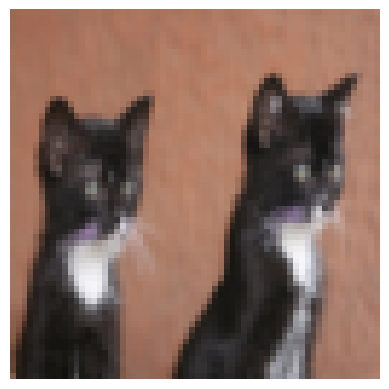

Model prediction: cat, True label: cat


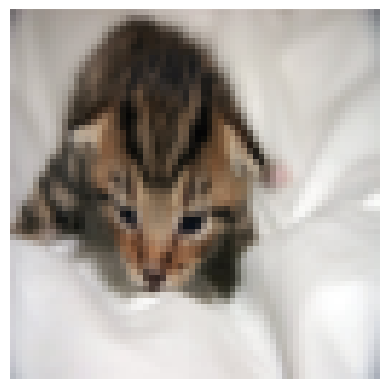

Model prediction: cat, True label: cat


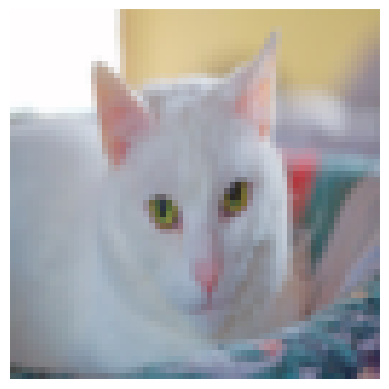

Model prediction: cat, True label: cat


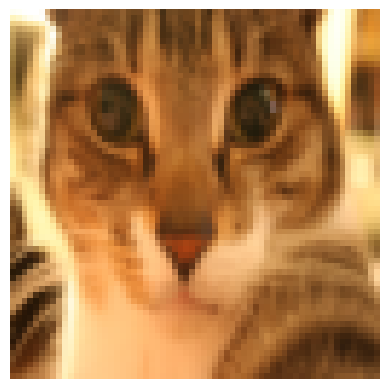

Model prediction: cat, True label: cat


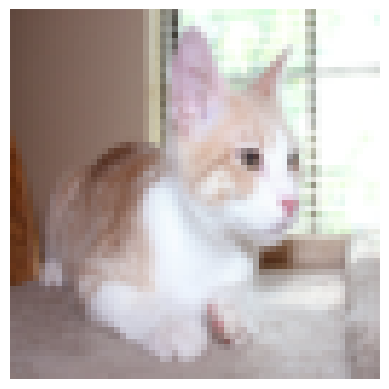

In [16]:
import matplotlib.pyplot as plt
import numpy as np

def show_prediction(index, X, y, parameters, classes):
    image = X[:, index].reshape((64, 64, 3))
    AL, _ = L_model_forward(X[:, index:index+1], parameters)
    pred = int(AL > 0.5)

    plt.imshow(image)
    plt.axis('off')
    print(f"Model prediction: {classes[pred].decode('utf-8')}, True label: {classes[int(y[0, index])].decode('utf-8')}")
    plt.show()
classes = np.array([b'non-cat', b'cat'])

# Example: test first 5 images
for i in range(5):
    show_prediction(i, test_x, test_y, parameters, classes)

